<a href="https://colab.research.google.com/github/van-dang/FEniCS-Colab/blob/master/Lab1_DD2365.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup the working environment

In [2]:
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil
import numpy as np 


dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

!rm -rf * # clean up all files
# Useful commands
# Remove an empty folder      : os.rmdir("my_results")
# Remove a folder with files  : shutil.rmtree("results")
# Make a folder               : os.mkdir("my_results")
# Runtime/Change_runtime_type/Python3

dolfin version: 2018.1.0


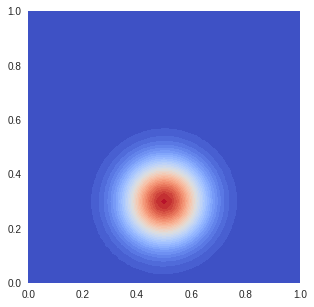

In [14]:
mesh = UnitSquareMesh(40, 40)

QE = FiniteElement("CG", mesh.ufl_cell(), 1); 
Q = FunctionSpace(mesh, QE);

v = TestFunction(Q)
u = Function(Q) # FEM solution

f = Expression("50*exp(-50*(pow(x[0] - 0.5, 2) + pow(x[1] - 0.3, 2)))",degree=1) 

r = (u*v - f*v)*dx

solve(r == 0, u)

plt.figure()
fig = plt.gcf(); fig.set_size_inches(5, 5)
plot(u, cmap="coolwarm");

